In [2]:
import pandas as pd
from typing import List
from pandas import DataFrame
from tabulate import tabulate
import os
import calendar
import matplotlib.pyplot as plt

In [3]:
def concat_path(folder_name, file_name):
  return os.path.join(folder_name, file_name)

In [4]:
def current_dir(dir_target: str) -> str:
  current_dir = os.getcwd()
  folder_path = concat_path(current_dir, dir_target)
  return folder_path

In [5]:
def get_csv_files(folder_name: str) -> List[str]:
  running_folder_path = current_dir(folder_name)
  files_in_running_folder = os.listdir(running_folder_path)
  files = sorted([concat_path(running_folder_path, file) for file in files_in_running_folder])

  return files

In [6]:
def edit_date_format(date: str):
  date_split = date.split(' ')
  del date_split[3]
  new_date_format = ' '.join(date_split)

  return new_date_format.strip()

In [7]:
def rename_column(df: DataFrame, old_name: str, new_name: str) -> None:
  df.rename(columns={old_name: new_name}, inplace=True)

In [8]:
def drop_column(df: DataFrame, column: str) -> None:
  df.drop(columns=[column], inplace=True)

In [9]:
def sec_to_min(sec: float) -> str:
  min = int(sec // 60)
  sec = int(sec % 60)

  if (len(str(sec)) == 1): sec = f'0{sec}'
  
  return f'{min}:{sec}'


sec_to_min(336.572727)


'5:36'

In [10]:
def convert_activity(activity):
  if (activity == 'Running (Indoor)'):
    return 'indoor'
  return 'outdoor'

In [11]:
def filter_interval_400m(df: DataFrame):
  return df[(df['Distance(km)'] >= 0.38) & (df['Distance(km)'] <= 0.43)]

In [12]:
def filter_interval_1k(df: DataFrame):
  return df[(df['Distance(km)'] >= 1) & (df['Distance(km)'] <= 1.1)]

In [13]:
def filter_interval_1_2k(df: DataFrame):
  return df[(df['Distance(km)'] >= 1.2) & (df['Distance(km)'] <= 1.35)]

In [14]:
def filter_interval_2k(df: DataFrame):
  return df[(df['Distance(km)'] >= 2) & (df['Distance(km)'] <= 2.25)]

In [15]:
def filter_5K(df: DataFrame):
  return df[(df['Distance(km)'] >= 5) & (df['Distance(km)'] <= 5.1) ]

In [16]:
def filter_7K(df: DataFrame):
  return df[(df['Distance(km)'] >= 7) & (df['Distance(km)'] <= 7.1) ]

In [17]:
def filter_10K(df: DataFrame):
  return df[(df['Distance(km)'] >= 10) & (df['Distance(km)'] <= 10.1)]

In [18]:
def filter_longrun(df: DataFrame):
  return df[(df['Distance(km)'] >= 10.5)]

In [19]:
def only_date(date: str):
  return date[:10]

In [20]:
def only_month(date: str):
  month = date[5:7]
  return month  

In [21]:
def date_selector(df: DataFrame, date: str) -> DataFrame:
  return df[df['Date'].astype(str).str.contains(date)]

In [22]:
def mean_column(df: DataFrame, column: str):
  return round(df[column].mean(), 2)

In [23]:
d = '2566-10-02 18:20:31 - 2566-10-02 18:39:08'
a = list(set(d.split(' ')))
k = [i for i in a if i != '-']

t = '-'.join(k[:2])
v = f'{t} {k[2]}'
v


'18:20:31-18:39:08 2566-10-02'

In [24]:
runningcsv_files = get_csv_files('running')

df = pd.concat( 
  map(pd.read_csv, runningcsv_files), 
  ignore_index=True
)

rename_column(df, 'Active energy burned(kcal)', 'Energy (kcal)')
rename_column(df, 'Heart rate: Average(count/min)', 'Heart rate: Average(min)')
rename_column(df, 'Heart rate: Maximum(count/min)', 'Heart rate: Maximum(min)')

drop_columns = [
  'Heart rate zone: A Easy (<115bpm)(%)',
  'Heart rate zone: B Fat Burn (115-135bpm)(%)',
  'Heart rate zone: C Moderate Training (135-155bpm)(%)',
  'Heart rate zone: D Hard Training (155-175bpm)(%)',
  'Heart rate zone: E Extreme Training (>175bpm)(%)',
  'Elevation: Ascended(m)',
  'Elevation: Maximum(m)',
  'Elevation: Minimum(m)',
  'METs Average(kcal/hr·kg)',
  'Weather: Humidity(%)',
  'Weather: Temperature(degC)',
]

for column in drop_columns:
  drop_column(df, column)

df['Pace(sec)'] = df['Duration(s)'] / df['Distance(km)']
df['Pace(min)'] = df['Pace(sec)'].apply(sec_to_min)
df['Activity'] = df['Activity'].apply(convert_activity)
df['Date'] = df['Date'].apply(edit_date_format)
df['Duration(min)'] = df['Duration(s)'].apply(sec_to_min)

column_order = ['Date', 'Energy (kcal)', 'Activity', 'Distance(km)', 'Duration(min)', 'Pace(min)', 'Heart rate: Average(min)', 'Heart rate: Maximum(min)']
d = df[column_order]

d



,Date,Energy (kcal),Activity,Distance(km),Duration(min),Pace(min),Heart rate: Average(min),Heart rate: Maximum(min)
0,2566-10-02 18:20:31 - 18:39:08,183.992,indoor,3.300,18:30,5:36,164.525,182.0
1,2566-10-03 18:34:49 - 19:03:43,267.510,indoor,4.631,28:14,6:06,166.159,197.0
2,2566-10-04 18:09:39 - 18:53:54,434.123,indoor,7.388,38:18,5:11,158.990,189.0
3,2566-10-05 10:06:21 - 10:34:35,306.220,indoor,5.565,27:54,5:00,160.902,183.0
4,2566-10-05 17:32:16 - 17:40:01,80.592,indoor,1.488,7:42,5:10,176.280,188.0
...,...,...,...,...,...,...,...,...
427,2568-01-29 08:04:05 - 08:35:20,347.510,outdoor,5.000,31:15,6:15,139.667,152.0
428,2568-01-29 16:54:25 - 17:05:32,122.000,outdoor,1.996,11:07,5:34,137.000,137.0
429,2568-01-29 17:13:34 - 17:16:22,46.195,outdoor,0.746,2:48,3:45,NaN,NaN
430,2568-01-29 17:24:37 - 17:34:08,127.318,outdoor,1.921,9:31,4:57,135.000,135.0


In [25]:
def filter_value(df: DataFrame, column: str, value: str) -> DataFrame:
  return df[df[column] == value]

In [26]:
outdoor = filter_value(df, 'Activity', 'outdoor')
outdoor.reset_index()[column_order]

,Date,Energy (kcal),Activity,Distance(km),Duration(min),Pace(min),Heart rate: Average(min),Heart rate: Maximum(min)
0,2566-10-07 07:57:08 - 08:17:11,179.592,outdoor,3.041,17:39,5:48,167.339,179.0
1,2566-10-14 17:30:23 - 17:58:10,253.719,outdoor,4.017,19:50,4:56,162.639,186.0
2,2566-10-21 17:57:09 - 18:16:47,147.069,outdoor,2.090,10:58,5:15,143.814,178.0
3,2566-10-23 08:02:10 - 08:31:26,267.240,outdoor,4.104,22:38,5:31,154.657,175.0
4,2566-10-30 17:41:32 - 18:15:11,291.367,outdoor,4.016,21:38,5:23,166.435,191.0
...,...,...,...,...,...,...,...,...
352,2568-01-29 08:04:05 - 08:35:20,347.510,outdoor,5.000,31:15,6:15,139.667,152.0
353,2568-01-29 16:54:25 - 17:05:32,122.000,outdoor,1.996,11:07,5:34,137.000,137.0
354,2568-01-29 17:13:34 - 17:16:22,46.195,outdoor,0.746,2:48,3:45,NaN,NaN
355,2568-01-29 17:24:37 - 17:34:08,127.318,outdoor,1.921,9:31,4:57,135.000,135.0


In [27]:
indoor = filter_value(df, 'Activity', 'indoor')
indoor.reset_index()[column_order]

,Date,Energy (kcal),Activity,Distance(km),Duration(min),Pace(min),Heart rate: Average(min),Heart rate: Maximum(min)
0,2566-10-02 18:20:31 - 18:39:08,183.992,indoor,3.300,18:30,5:36,164.525,182.0
1,2566-10-03 18:34:49 - 19:03:43,267.510,indoor,4.631,28:14,6:06,166.159,197.0
2,2566-10-04 18:09:39 - 18:53:54,434.123,indoor,7.388,38:18,5:11,158.990,189.0
3,2566-10-05 10:06:21 - 10:34:35,306.220,indoor,5.565,27:54,5:00,160.902,183.0
4,2566-10-05 17:32:16 - 17:40:01,80.592,indoor,1.488,7:42,5:10,176.280,188.0
...,...,...,...,...,...,...,...,...
70,2567-09-18 18:39:21 - 18:43:10,57.590,indoor,1.022,3:39,3:34,190.000,192.0
71,2567-11-14 10:37:56 - 10:48:40,126.562,indoor,1.850,10:35,5:43,163.186,181.0
72,2567-11-14 10:55:08 - 10:59:31,55.689,indoor,1.026,4:21,4:14,180.373,186.0
73,2568-01-08 17:52:18 - 18:29:26,335.389,indoor,6.205,37:07,5:59,142.564,152.0


In [28]:
filter_interval_400m(df)

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
97,2567-02-17 18:24:30 - 18:28:02,22.642,outdoor,0.399,76.541,166.520,194.0,191.832080,3:11,1:16
226,2567-08-30 07:01:31 - 07:03:11,23.133,outdoor,0.426,81.541,188.500,194.0,191.410798,3:11,1:21
228,2567-08-30 07:10:30 - 07:13:10,23.223,outdoor,0.413,82.937,175.429,189.0,200.815981,3:20,1:22
229,2567-08-30 07:16:18 - 07:17:48,23.110,outdoor,0.426,82.536,NaN,NaN,193.746479,3:13,1:22
230,2567-08-30 07:22:47 - 07:24:38,22.770,outdoor,0.406,83.054,181.500,185.0,204.566502,3:24,1:23
342,2567-12-15 17:32:11 - 17:33:48,22.308,outdoor,0.393,96.844,172.500,183.0,246.422392,4:06,1:36
357,2567-12-22 17:39:01 - 17:40:31,19.214,outdoor,0.414,89.819,181.250,183.0,216.954106,3:36,1:29
366,2568-01-04 17:30:14 - 17:31:45,22.471,outdoor,0.416,83.886,190.750,196.0,201.649038,3:21,1:23
367,2568-01-04 17:33:48 - 17:35:28,21.642,outdoor,0.428,90.691,179.727,190.0,211.894860,3:31,1:30
368,2568-01-04 17:38:12 - 17:39:49,21.227,outdoor,0.421,87.310,179.455,195.0,207.387173,3:27,1:27


In [53]:
filter_interval_1k(df)["Distance(km)"].sum()

np.float64(54.50400000000001)

In [30]:
filter_interval_1_2k(df)

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
180,2567-07-12 17:51:04 - 18:17:45,70.046,outdoor,1.307,514.876,119.886,154.0,393.937261,6:33,8:34
379,2568-01-07 17:54:57 - 17:59:33,66.075,outdoor,1.228,267.096,179.633,186.0,217.504886,3:37,4:27
380,2568-01-07 18:04:06 - 18:08:37,66.171,outdoor,1.234,268.409,180.406,188.0,217.511345,3:37,4:28
381,2568-01-07 18:13:10 - 18:17:46,68.903,outdoor,1.209,273.581,181.000,190.0,226.287014,3:46,4:33
382,2568-01-07 18:23:04 - 18:27:41,63.508,outdoor,1.256,270.848,184.568,191.0,215.643312,3:35,4:30
383,2568-01-07 18:38:30 - 18:43:09,68.423,outdoor,1.309,278.567,183.133,190.0,212.809015,3:32,4:38
384,2568-01-07 18:47:52 - 18:52:29,69.274,outdoor,1.305,271.121,174.625,177.0,207.755556,3:27,4:31
385,2568-01-07 18:57:32 - 19:02:09,67.947,outdoor,1.283,270.249,140.500,141.0,210.638348,3:30,4:30
386,2568-01-07 19:09:43 - 19:14:18,68.233,outdoor,1.260,266.223,186.467,197.0,211.288095,3:31,4:26
390,2568-01-10 18:07:08 - 18:11:31,66.954,outdoor,1.289,263.299,182.882,189.0,204.266098,3:24,4:23


In [31]:
filter_interval_2k(df)

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
18,2566-10-21 17:57:09 - 18:16:47,147.069,outdoor,2.090,658.899,143.814,178.0,315.262679,5:15,10:58
22,2566-10-25 10:21:52 - 10:52:46,147.595,indoor,2.139,749.817,129.842,168.0,350.545582,5:50,12:29
170,2567-06-22 18:24:11 - 18:41:40,107.515,outdoor,2.013,823.444,123.292,154.0,409.063090,6:49,13:43
199,2567-08-07 17:52:21 - 18:00:08,110.498,outdoor,2.031,465.636,176.570,185.0,229.264402,3:49,7:45
200,2567-08-07 18:05:59 - 18:14:24,110.093,outdoor,2.030,478.400,181.683,191.0,235.665025,3:55,7:58
201,2567-08-07 18:20:54 - 18:35:28,107.600,outdoor,2.019,474.281,167.378,190.0,234.908866,3:54,7:54
202,2567-08-07 18:36:20 - 18:44:19,109.150,outdoor,2.028,477.121,188.809,196.0,235.266765,3:55,7:57
203,2567-08-07 18:52:19 - 19:01:08,107.095,outdoor,2.013,484.349,185.566,194.0,240.610532,4:00,8:04
207,2567-08-14 18:08:55 - 18:16:50,106.121,outdoor,2.042,475.175,173.905,183.0,232.700784,3:52,7:55
208,2567-08-14 18:21:41 - 18:29:59,107.876,outdoor,2.024,479.365,180.800,190.0,236.840415,3:56,7:59


In [32]:
run5k = filter_5K(outdoor)
run5k

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
35,2566-11-13 17:34:55 - 18:06:49,273.554,outdoor,5.044,1858.161,163.325,176.0,368.390365,6:08,30:58
61,2566-12-28 07:37:58 - 08:07:19,266.105,outdoor,5.056,1464.858,142.500,161.0,289.726661,4:49,24:24
62,2566-12-28 17:44:22 - 18:11:36,266.066,outdoor,5.045,1477.712,168.188,178.0,292.906244,4:52,24:37
64,2567-01-02 07:28:04 - 07:54:03,267.671,outdoor,5.063,1487.952,164.318,174.0,293.887419,4:53,24:47
68,2567-01-06 17:45:50 - 18:12:15,268.547,outdoor,5.035,1359.984,181.058,201.0,270.106058,4:30,22:39
73,2567-01-13 17:49:44 - 18:13:43,268.425,outdoor,5.049,1438.501,175.733,184.0,284.908101,4:44,23:58
75,2567-01-16 17:57:52 - 18:22:36,267.875,outdoor,5.062,1388.165,166.141,179.0,274.232517,4:34,23:08
76,2567-01-17 17:53:35 - 18:16:36,272.726,outdoor,5.071,1380.688,175.953,188.0,272.271347,4:32,23:00
77,2567-01-18 17:55:43 - 18:50:13,268.990,outdoor,5.077,1338.707,140.719,193.0,263.680717,4:23,22:18
78,2567-01-19 17:48:30 - 18:11:47,271.672,outdoor,5.036,1338.811,182.986,191.0,265.848094,4:25,22:18


In [33]:
run7k = filter_7K(outdoor)
run7k

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
41,2566-11-22 17:17:00 - 18:06:44,361.793,outdoor,7.042,2549.349,161.180,174.0,362.020591,6:02,42:29
57,2566-12-22 17:40:06 - 18:13:32,374.418,outdoor,7.043,1966.304,180.819,187.0,279.185574,4:39,32:46
79,2567-01-20 17:53:21 - 18:26:55,374.721,outdoor,7.039,1987.794,172.833,184.0,282.397216,4:42,33:07
101,2567-02-25 17:51:05 - 18:23:58,377.729,outdoor,7.043,1917.996,186.358,198.0,272.326565,4:32,31:57
108,2567-03-09 17:59:04 - 18:31:08,375.394,outdoor,7.033,1886.370,175.895,191.0,268.216977,4:28,31:26
109,2567-03-10 17:57:45 - 18:29:11,377.391,outdoor,7.045,1875.851,181.804,192.0,266.266998,4:26,31:15
112,2567-03-15 18:15:23 - 18:48:50,376.427,outdoor,7.038,1959.521,178.816,186.0,278.420148,4:38,32:39
114,2567-05-03 18:21:18 - 19:01:59,373.897,outdoor,7.030,2343.601,172.104,194.0,333.371408,5:33,39:03
115,2567-05-05 18:20:32 - 19:15:29,377.770,outdoor,7.028,2156.188,164.770,194.0,306.799659,5:06,35:56
128,2567-05-25 18:23:31 - 19:14:44,371.488,outdoor,7.061,2072.546,156.806,193.0,293.520181,4:53,34:32


In [34]:
run10k = filter_10K(outdoor)
run10k

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
52,2566-12-16 17:26:05 - 18:16:58,563.603,outdoor,10.025,3028.179,181.844,192.0,302.062743,5:02,50:28
58,2566-12-23 17:24:30 - 18:13:01,529.661,outdoor,10.052,2848.219,182.775,194.0,283.348488,4:43,47:28
149,2567-06-07 17:56:23 - 19:08:14,539.981,outdoor,10.013,3513.891,161.056,179.0,350.932887,5:50,58:33
184,2567-07-17 17:47:12 - 18:56:46,532.442,outdoor,10.075,3125.050,153.784,198.0,310.178660,5:10,52:05
194,2567-08-02 06:44:35 - 07:44:34,571.590,outdoor,10.015,3199.652,160.694,191.0,319.485971,5:19,53:19
197,2567-08-06 18:05:22 - 19:00:02,539.658,outdoor,10.005,3275.234,153.855,193.0,327.359720,5:27,54:35
223,2567-08-22 17:24:33 - 18:34:00,550.113,outdoor,10.025,3570.027,154.648,173.0,356.112419,5:56,59:30
286,2567-11-04 16:31:14 - 17:30:46,559.908,outdoor,10.004,3275.073,167.492,200.0,327.376349,5:27,54:35
315,2567-11-26 17:14:48 - 18:08:36,683.426,outdoor,10.031,3227.944,172.793,192.0,321.796830,5:21,53:47
333,2567-12-06 16:23:51 - 17:23:42,557.056,outdoor,10.010,3591.585,144.189,153.0,358.799700,5:58,59:51


In [35]:
longrun = filter_longrun(outdoor)
longrun

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
152,2567-06-11 17:55:09 - 19:15:02,590.464,outdoor,10.632,3625.281,147.040,168.0,340.978273,5:40,60:25
159,2567-06-13 17:43:41 - 18:51:44,609.384,outdoor,10.551,3566.921,157.923,172.0,338.064733,5:38,59:26
162,2567-06-18 17:40:12 - 19:20:36,658.691,outdoor,12.017,4004.761,153.016,178.0,333.257968,5:33,66:44
169,2567-06-20 17:42:38 - 18:49:10,617.962,outdoor,11.029,3677.336,155.596,170.0,333.424245,5:33,61:17
181,2567-07-14 17:31:48 - 18:52:43,774.967,outdoor,13.250,4448.425,172.735,192.0,335.730189,5:35,74:08
186,2567-07-19 17:35:37 - 18:59:56,706.758,outdoor,13.010,4418.175,157.812,183.0,339.598386,5:39,73:38
193,2567-07-31 17:33:12 - 18:59:13,655.960,outdoor,11.832,4055.119,155.693,187.0,342.724730,5:42,67:35
195,2567-08-04 17:21:36 - 18:36:47,714.014,outdoor,12.017,4003.836,163.089,182.0,333.180994,5:33,66:43
214,2567-08-18 06:27:42 - 07:36:14,666.650,outdoor,12.041,3983.937,151.347,174.0,330.864297,5:30,66:23
231,2567-08-30 17:18:18 - 18:48:51,913.559,outdoor,16.242,5406.378,157.813,188.0,332.864056,5:32,90:06


In [36]:
year_df = date_selector(df, '2567').copy()
year_df.loc[:, 'Date'] = df['Date'].apply(edit_date_format)
year_df.loc[:, 'Month'] = year_df['Date'].apply(only_month)

all_months = pd.DataFrame({'Month': [f'{i:02d}' for i in range(1, 13)]})
monthly_distances = year_df.groupby('Month')["Distance(km)"].sum().reset_index()
monthly_distances = pd.merge(all_months, monthly_distances, on='Month', how='left')

monthly_distances['Distance(km)'] = monthly_distances['Distance(km)'].fillna(0)
monthly_distances['Distance(km)'] = monthly_distances['Distance(km)'].astype(float)
monthly_distances['Month'] = monthly_distances['Month'].astype(int)

monthly_distances['Month'] = monthly_distances['Month'].apply(lambda x: calendar.month_name[x])

monthly_distances


,Month,Distance(km)
0,January,116.067
1,February,72.262
2,March,60.718
3,April,0.000
4,May,97.602
5,June,150.875
6,July,110.270
7,August,202.377
8,September,197.734
9,October,35.541


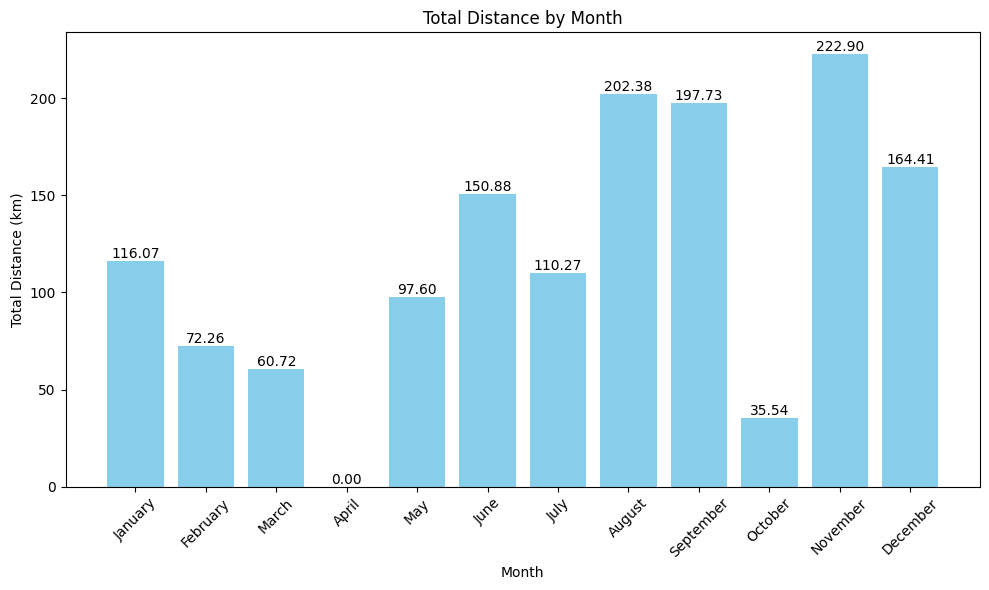

In [37]:
plt.figure(figsize=(10, 6))
bars = plt.bar(
  monthly_distances['Month'], 
  monthly_distances['Distance(km)'], 
  color='skyblue'
)

plt.xlabel('Month')
plt.ylabel('Total Distance (km)')
plt.title('Total Distance by Month')

for bar in bars:
  height = bar.get_height()
  plt.text(
    bar.get_x() + bar.get_width() / 2, 
    height, 
    f'{height:.2f}', 
    ha='center', va='bottom', fontsize=10
  )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


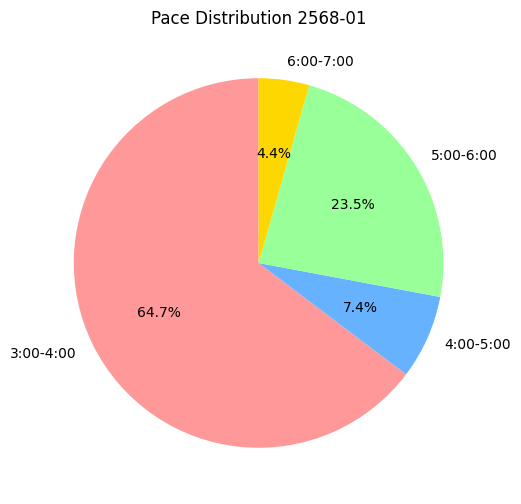

In [38]:
date = "2568-01"
bins = [180, 240, 300, 360, 420]
labels = ["3:00-4:00", "4:00-5:00", "5:00-6:00", "6:00-7:00"]

pie = date_selector(df, date).copy()
pie["Pace Group"] = pd.cut(pie["Pace(sec)"], bins=bins, labels=labels, right=False)
group_counts = pie["Pace Group"].value_counts(sort=False)

plt.figure(figsize=(8, 6))
group_counts.plot.pie(
  autopct="%1.1f%%", 
  startangle=90, 
  colors=["#FF9999", "#66B2FF", "#99FF99", "#FFD700"], 
  labels=group_counts.index
)
plt.title(f"Pace Distribution {date}")
plt.ylabel("")
plt.show()

In [39]:
def pace_table(data) -> str:
  fastest_pace = df.loc[data]

  table_data = {
    'Date': [fastest_pace['Date']],
    'Energy (kcal)': [fastest_pace['Energy (kcal)']],
    'Activity': [fastest_pace['Activity']],
    'Distance(km)': [fastest_pace['Distance(km)']],
    'Duration(s)': [fastest_pace['Duration(s)']],
    'Pace(min)': [fastest_pace['Pace(min)']],
    'Pace(sec)': [fastest_pace['Pace(sec)']],
    'Heart rate: Average(min)': [fastest_pace['Heart rate: Average(min)']],
    'Heart rate: Maximum(min)': [fastest_pace['Heart rate: Maximum(min)']]
  }

  return tabulate(table_data, headers='keys', tablefmt='pretty')

In [40]:
fastest_pace_outdoor = outdoor['Pace(sec)'].idxmin()
fastest_pace_indoor = indoor['Pace(sec)'].idxmin()

fastest_outdoor_pace_table = df.loc[fastest_pace_outdoor]
fastest_indoor_pace_table = df.loc[fastest_pace_indoor]

print('The fastest pace outdoor')
print(fastest_outdoor_pace_table)
print()

print('The fastest pace indoor')
print(fastest_indoor_pace_table)

The fastest pace outdoor
Date                        2567-08-30 07:01:31 - 07:03:11
Energy (kcal)                                       23.133
Activity                                           outdoor
Distance(km)                                         0.426
Duration(s)                                         81.541
Heart rate: Average(min)                             188.5
Heart rate: Maximum(min)                             194.0
Pace(sec)                                       191.410798
Pace(min)                                             3:11
Duration(min)                                         1:21
Name: 226, dtype: object

The fastest pace indoor
Date                        2567-09-18 18:39:21 - 18:43:10
Energy (kcal)                                        57.59
Activity                                            indoor
Distance(km)                                         1.022
Duration(s)                                         219.26
Heart rate: Average(min)                

In [41]:
distance = df['Distance(km)'].sum()
print(f'Overall {distance:.2f} km')

Overall 1917.26 km


In [42]:
fastest5k = run5k['Pace(min)'].idxmin()
print("Fatest of 5 KM.")
run5k.loc[fastest5k]

Fatest of 5 KM.


Date                        2567-07-24 18:36:27 - 18:57:01
Energy (kcal)                                      272.044
Activity                                           outdoor
Distance(km)                                         5.026
Duration(s)                                       1177.557
Heart rate: Average(min)                           182.889
Heart rate: Maximum(min)                             202.0
Pace(sec)                                       234.293076
Pace(min)                                             3:54
Duration(min)                                        19:37
Name: 191, dtype: object

In [43]:
fastest7k = run7k['Pace(min)'].idxmin()
print("Fatest of 7 KM.")
run7k.loc[fastest7k]

Fatest of 7 KM.


Date                        2567-06-08 18:13:40 - 19:01:30
Energy (kcal)                                      370.562
Activity                                           outdoor
Distance(km)                                         7.044
Duration(s)                                       1852.672
Heart rate: Average(min)                           152.381
Heart rate: Maximum(min)                             190.0
Pace(sec)                                       263.014196
Pace(min)                                             4:23
Duration(min)                                        30:52
Name: 150, dtype: object

In [44]:
fastest10k = run10k['Pace(min)'].idxmin()
print("Fatest of 10 KM.")
run10k.loc[fastest10k]

Fatest of 10 KM.


Date                        2566-12-23 17:24:30 - 18:13:01
Energy (kcal)                                      529.661
Activity                                           outdoor
Distance(km)                                        10.052
Duration(s)                                       2848.219
Heart rate: Average(min)                           182.775
Heart rate: Maximum(min)                             194.0
Pace(sec)                                       283.348488
Pace(min)                                             4:43
Duration(min)                                        47:28
Name: 58, dtype: object

In [45]:
start = '2567-10'
end = '2567-12'
quarterly_running = df[(df['Date'] >= start) & (df['Date'] <= end + '-31')]
quarterly_running_day = quarterly_running['Date'].apply(only_date).nunique()
quarterly_distance_running = quarterly_running['Distance(km)'].sum()

print(f'Duration {start} to {end}')
print(quarterly_running_day, 'days')
print(len(quarterly_running), 'runs')
print(f'{quarterly_distance_running:.2f} km')

Duration 2567-10 to 2567-12
41 days
88 runs
422.85 km


In [46]:
year = '2567'
year_running = date_selector(df, year)
year_running_day = year_running['Date'].apply(only_date).nunique()
year_distance_running = year_running['Distance(km)'].sum()

print(f'Year {year}')
print(year_running_day, 'days')
print(len(year_running), 'runs')
print(f'{year_distance_running:.2f} km')

Year 2567
178 days
299 runs
1430.76 km


In [47]:
print('Data on', date)

distance = 'Distance(km)'
indoor = 'indoor'
pace = 'Pace(sec)'
outdoor = 'outdoor'

running = date_selector(df, date)
running_day = running['Date'].apply(only_date).nunique()


def mean(column: str):
  return mean_column(running, column)

def find_best_data_column(activity: str, column: str):
  activity_condition = (running['Activity'] == activity)
  distance_condition = (running[distance] > 5)
  condition = activity_condition & distance_condition
  filtered_df = running[condition][column]
  try:
    if column == pace:
      return filtered_df.idxmin()
    
    return filtered_df.idxmax()
  except: return None

def best_loc_data(idx, column: str) -> DataFrame:
  if idx is None:
    return None
  if column == pace:
    return sec_to_min(running.loc[idx][column])
  
  return running.loc[idx][column]

avg_distance = mean(distance)
avg_duration = sec_to_min(mean('Duration(s)'))
avg_pace = sec_to_min(mean(pace))
avg_heart_rate = mean('Heart rate: Average(min)')
avg_max_heart_rate = mean('Heart rate: Maximum(min)')

id_fastest_pace_indoor = find_best_data_column(indoor, pace)
fastest_pace_indoor = best_loc_data(id_fastest_pace_indoor, pace)
id_fastest_pace_outdoor = find_best_data_column(outdoor, pace)
fastest_pace_outdoor = best_loc_data(id_fastest_pace_outdoor, pace)


id_longest_distance_indoor = find_best_data_column(indoor, distance)
longest_distance_indoor = best_loc_data(id_longest_distance_indoor, distance)
id_longest_distance_outdoor = find_best_data_column(outdoor, distance)
longest_distance_outdoor = best_loc_data(id_longest_distance_outdoor, distance)

all_distance = running['Distance(km)'].sum()

print(running_day, 'days')
print(len(running), 'runs')
print(f'{all_distance:.2f} km')
print()
print('Fastest run indoor pace', fastest_pace_indoor, 'km')
print('Fastest run outdoor pace', fastest_pace_outdoor, 'km')
print()
print('Longest distance indoor', longest_distance_indoor, 'km')
print('Longest distance outdoor', longest_distance_outdoor, 'km')
print()
print('Average distance', avg_distance, 'km')
print('Average time', avg_duration, 'min')
print('Average pace', avg_pace, 'min')
print('Average heart rate', avg_heart_rate, 'per min')
print('Average max heart rate', avg_max_heart_rate, 'per min')

Data on 2568-01
19 days
70 runs
169.99 km

Fastest run indoor pace 5:24 km
Fastest run outdoor pace 3:58 km

Longest distance indoor 6.205 km
Longest distance outdoor 11.498 km

Average distance 2.43 km
Average time 12:11 min
Average pace 4:21 min
Average heart rate 167.2 per min
Average max heart rate 177.8 per min
